# DATA LINk : https://www.kaggle.com/datasets/gpiosenka/100-bird-species

### 1-explore data

#### 1.1- number of classes ?


In [42]:
import os 
print(len(os.listdir("/kaggle/input/100-bird-species/train")))


450


#### 1.2- how many images in each class?


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import random

for i in os.listdir("/kaggle/input/100-bird-species/train"):
    print ("class : "+i)     
    print("number of images : "+str(len(os.listdir(f"/kaggle/input/100-bird-species/train/{i}"))))
    


class : DALMATIAN PELICAN
number of images : 159
class : WATTLED CURASSOW
number of images : 138
class : AMERICAN WIGEON
number of images : 187
class : CARMINE BEE-EATER
number of images : 162
class : GAMBELS QUAIL
number of images : 153
class : UMBRELLA BIRD
number of images : 155
class : AMERICAN KESTREL
number of images : 155
class : AMERICAN GOLDFINCH
number of images : 133
class : DUSKY LORY
number of images : 139
class : AUCKLAND SHAQ
number of images : 187
class : BLACK THROATED WARBLER
number of images : 135
class : YELLOW CACIQUE
number of images : 155
class : STRIPPED SWALLOW
number of images : 160
class : VERMILION FLYCATHER
number of images : 155
class : CAPE MAY WARBLER
number of images : 154
class : RED TAILED HAWK
number of images : 202
class : GURNEYS PITTA
number of images : 163
class : INDIAN ROLLER
number of images : 183
class : AZURE TANAGER
number of images : 137
class : GREEN MAGPIE
number of images : 176
class : BANDED BROADBILL
number of images : 194
class : IND

#### 1.3- show sample of images

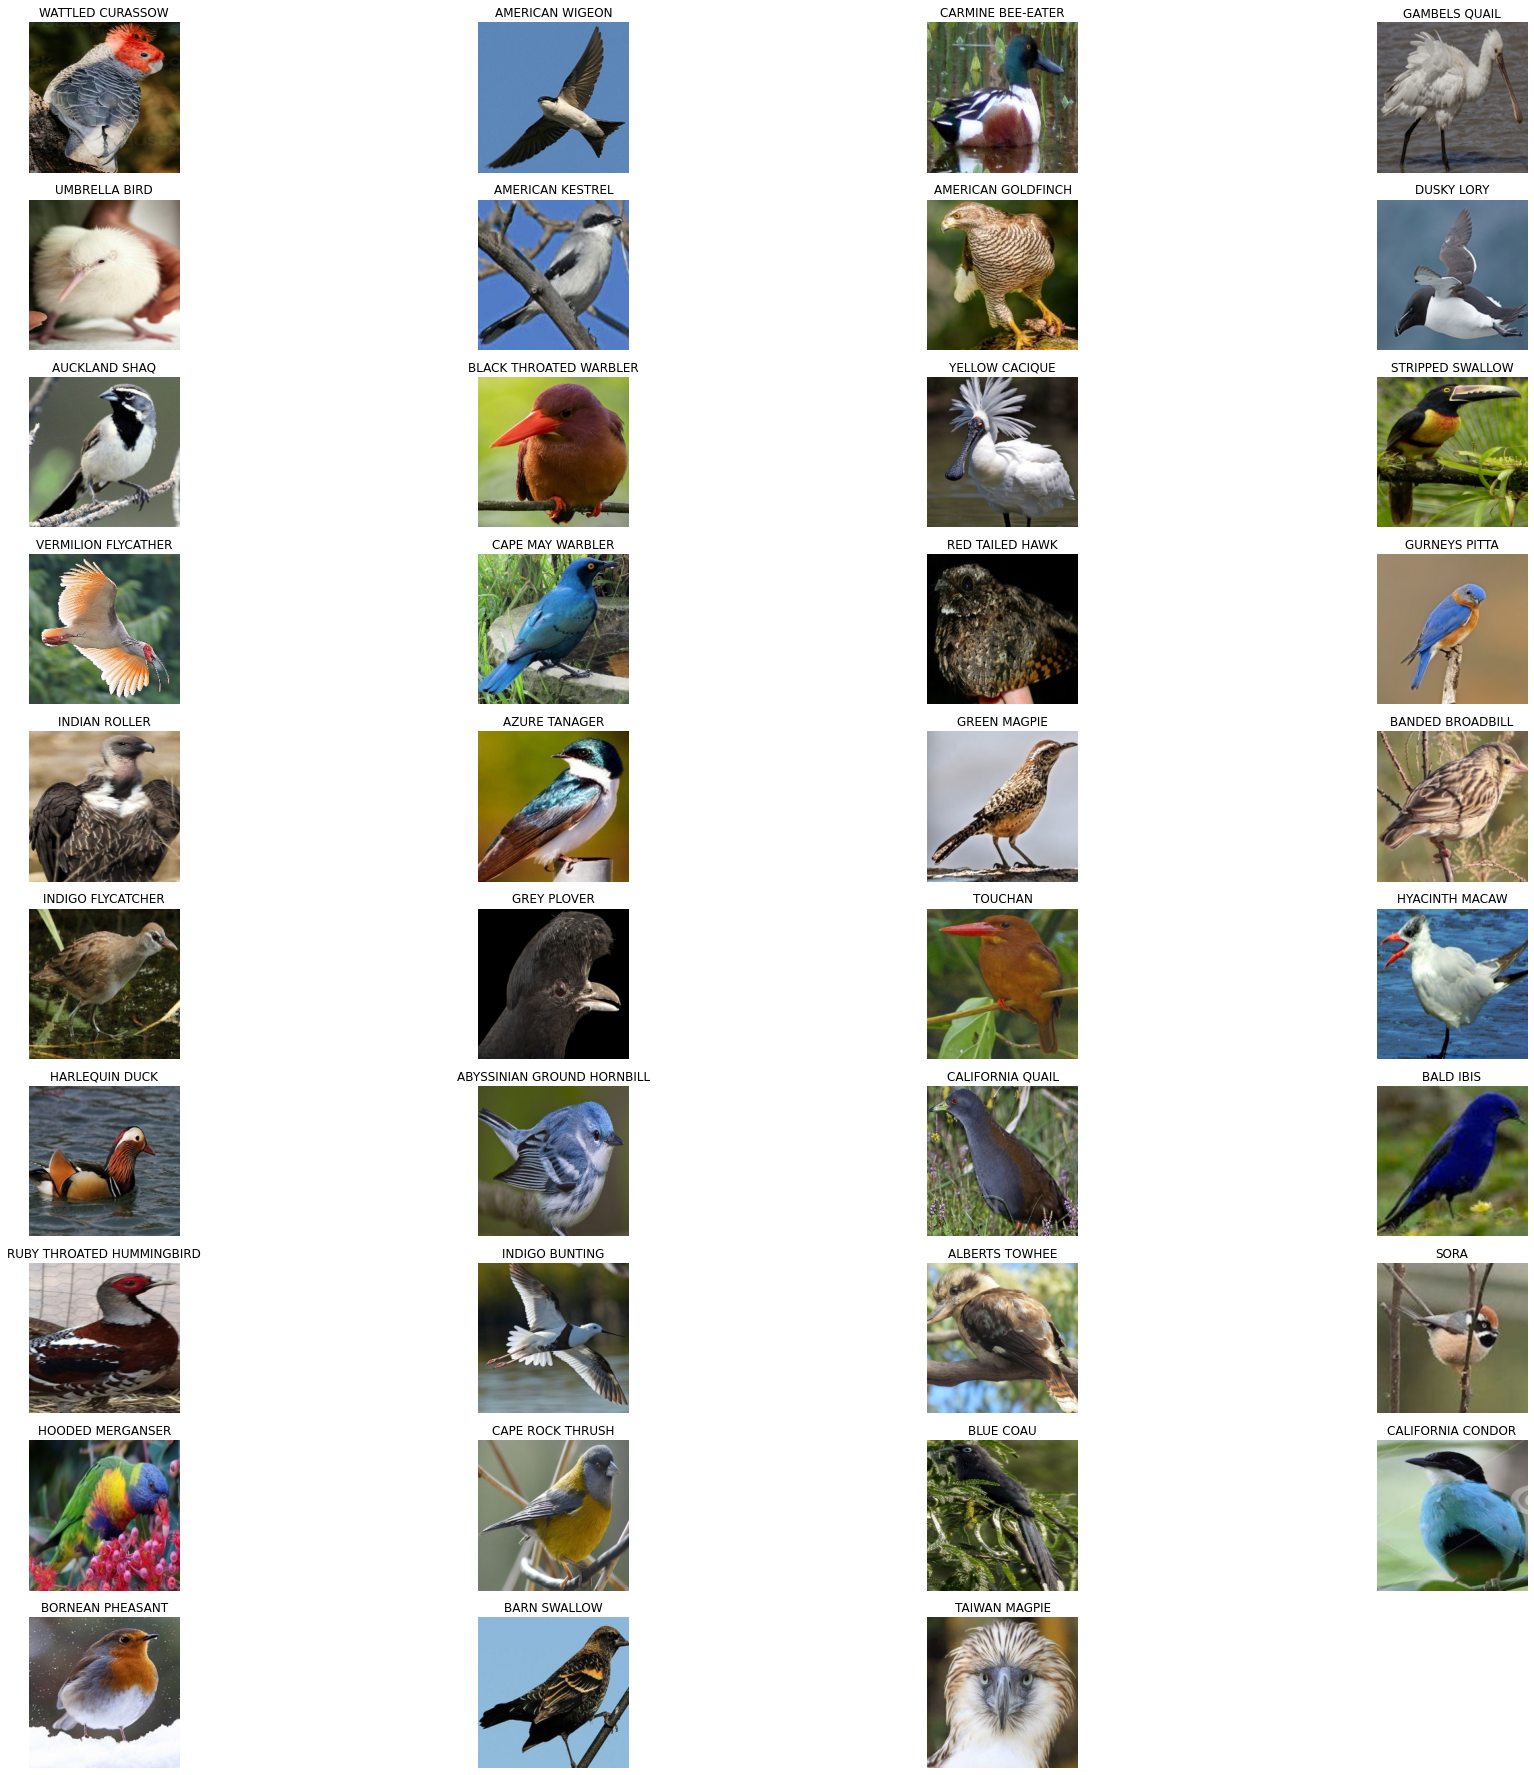

In [44]:
plt.figure(figsize=(25,25))
classes=os.listdir("/kaggle/input/100-bird-species/train")
for i in range(1,40):
    path = f"/kaggle/input/100-bird-species/train/{random.choice(classes)}"
    plt.subplot(10,4,i)
    plt.tight_layout()
    rand_img = plt.imread(path +'/' +random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.title(classes[i])
    plt.axis("off")


#### what shape of image? 

In [45]:
for i in range(1,10):
    path = f"/kaggle/input/100-bird-species/train/{random.choice(classes)}"
    rand_img = plt.imread(path +'/' +random.choice(sorted(os.listdir(path))))
    print(rand_img.shape)


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


### 2. Data Preprocessing¶


### 

#### 2.1- import libraries

In [46]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#### 2.2- define directories

In [47]:
train_dir = "/kaggle/input/100-bird-species/train/"
test_dir = "/kaggle/input/100-bird-species/test/"
val_dir = "/kaggle/input/100-bird-species/valid/"

## Model 1  (MobileNetV2)

In [48]:
MobileNetModel = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
     include_top=False, 
     weights='imagenet',
     pooling='avg'
)
MobileNetModel.trainable = False

inputs = MobileNetModel.input

x = tf.keras.layers.Dense(512, activation='relu')(MobileNetModel.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(450, activation='softmax')(x)

model_1 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [49]:
train_datagen = ImageDataGenerator(
                                    horizontal_flip = True,
                                  preprocessing_function =tf.keras.applications.mobilenet.preprocess_input )
test_datagen = ImageDataGenerator(
                                    horizontal_flip = True,
                                     preprocessing_function =tf.keras.applications.mobilenet.preprocess_input)
valid_datagen = ImageDataGenerator(
                                        horizontal_flip = True,
                                    preprocessing_function =tf.keras.applications.mobilenet.preprocess_input)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


In [50]:
model_1.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.0005), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

history_1 = model_1.fit(
    train_data ,
    epochs=10,
    validation_data = val_data,
    batch_size=32)

Epoch 1/10
2208/2208 [==============================] - 247s 111ms/step - loss: 1.5776 - accuracy: 0.6304 - val_loss: 0.5905 - val_accuracy: 0.8307
Epoch 2/10
2208/2208 [==============================] - 249s 113ms/step - loss: 0.6371 - accuracy: 0.8232 - val_loss: 0.4301 - val_accuracy: 0.8698
Epoch 3/10
2208/2208 [==============================] - 241s 109ms/step - loss: 0.4551 - accuracy: 0.8691 - val_loss: 0.4311 - val_accuracy: 0.8747
Epoch 4/10
2208/2208 [==============================] - 257s 116ms/step - loss: 0.3388 - accuracy: 0.8989 - val_loss: 0.4105 - val_accuracy: 0.8840
Epoch 5/10
2208/2208 [==============================] - 251s 114ms/step - loss: 0.2584 - accuracy: 0.9198 - val_loss: 0.3556 - val_accuracy: 0.8973
Epoch 6/10
2208/2208 [==============================] - 244s 110ms/step - loss: 0.2021 - accuracy: 0.9375 - val_loss: 0.3770 - val_accuracy: 0.8956
Epoch 7/10
2208/2208 [==============================] - 238s 108ms/step - loss: 0.1698 - accuracy: 0.9454 - val_

### Model 2 (ResNet50)

In [51]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


In [52]:
train_datagen = ImageDataGenerator(                     
                                    horizontal_flip = True,
                                    preprocessing_function =  preprocess_input)
test_datagen = ImageDataGenerator(                      
                                    horizontal_flip = True,
                                 preprocessing_function = preprocess_input)
valid_datagen = ImageDataGenerator(                  
                                        horizontal_flip = True,
                                  preprocessing_function = preprocess_input)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


In [53]:
resnet50Model =ResNet50(
    input_shape=(224, 224, 3),
     include_top=False, 
    weights="imagenet",
     pooling='avg'
)
resnet50Model.trainable = False

inputs = resnet50Model.input
x = tf.keras.layers.Dense(512, activation='relu')(resnet50Model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(450, activation='softmax')(x)

model_2 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [54]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
                metrics = ["accuracy"])

history_2 =model_2.fit(train_data,
                                 epochs=10,
                                 validation_data = val_data)

Epoch 1/10
2208/2208 [==============================] - 271s 121ms/step - loss: 1.4476 - accuracy: 0.6594 - val_loss: 0.5266 - val_accuracy: 0.8618
Epoch 2/10
2208/2208 [==============================] - 276s 125ms/step - loss: 0.5055 - accuracy: 0.8577 - val_loss: 0.3600 - val_accuracy: 0.8920
Epoch 3/10
2208/2208 [==============================] - 262s 119ms/step - loss: 0.3556 - accuracy: 0.8960 - val_loss: 0.2869 - val_accuracy: 0.9133
Epoch 4/10
2208/2208 [==============================] - 273s 124ms/step - loss: 0.2674 - accuracy: 0.9196 - val_loss: 0.3032 - val_accuracy: 0.9071
Epoch 5/10
2208/2208 [==============================] - 264s 120ms/step - loss: 0.2122 - accuracy: 0.9344 - val_loss: 0.2928 - val_accuracy: 0.9169
Epoch 6/10
2208/2208 [==============================] - 270s 122ms/step - loss: 0.1754 - accuracy: 0.9447 - val_loss: 0.3127 - val_accuracy: 0.9151
Epoch 7/10
2208/2208 [==============================] - 266s 120ms/step - loss: 0.1491 - accuracy: 0.9542 - val_

### model 3 (VGG16)

In [55]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


In [56]:
train_datagen = ImageDataGenerator(                     
                                    horizontal_flip = True,
                                    preprocessing_function =  preprocess_input)
test_datagen = ImageDataGenerator(                      
                                    horizontal_flip = True,
                                 preprocessing_function = preprocess_input)
valid_datagen = ImageDataGenerator(                  
                                        horizontal_flip = True,
                                  preprocessing_function = preprocess_input)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


In [57]:
vgg16Model =VGG16(
    input_shape=(224, 224, 3),
     include_top=False, 
    weights="imagenet",
     pooling='avg'
)
vgg16Model.trainable = False

inputs = vgg16Model.input
x = tf.keras.layers.Dense(512, activation='relu')(vgg16Model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(450, activation='softmax')(x)

model_3 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [58]:
model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
                metrics = ["accuracy"])

history_3 =model_3.fit(train_data,
                                 epochs=10,
                                 validation_data = val_data)

Epoch 1/10
2208/2208 [==============================] - 268s 121ms/step - loss: 1.6057 - accuracy: 0.6283 - val_loss: 0.6057 - val_accuracy: 0.8227
Epoch 2/10
2208/2208 [==============================] - 273s 124ms/step - loss: 0.6427 - accuracy: 0.8224 - val_loss: 0.4617 - val_accuracy: 0.8693
Epoch 3/10
2208/2208 [==============================] - 273s 124ms/step - loss: 0.4729 - accuracy: 0.8650 - val_loss: 0.3893 - val_accuracy: 0.8920
Epoch 4/10
2208/2208 [==============================] - 276s 125ms/step - loss: 0.3737 - accuracy: 0.8896 - val_loss: 0.4893 - val_accuracy: 0.8684
Epoch 5/10
2208/2208 [==============================] - 271s 123ms/step - loss: 0.3099 - accuracy: 0.9065 - val_loss: 0.4121 - val_accuracy: 0.8982
Epoch 6/10
2208/2208 [==============================] - 348s 158ms/step - loss: 0.2616 - accuracy: 0.9200 - val_loss: 0.4761 - val_accuracy: 0.8796
Epoch 7/10
2208/2208 [==============================] - 265s 120ms/step - loss: 0.2298 - accuracy: 0.9295 - val_